In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Aufgabe 10: Bildkomprimierung mit SVD

Ergänzen die Funktionen `compress(A, percent)` und `decompress(u, s, v)` die folgendes erledigen:
Es wird eine Matrix mit Bilddateninformationen eingelesen. Diese wird dann mit `compress` komprimiert, das auf der Singulärwertzerlegung von `A` basieren soll wie im Skript in Beispiel 6.3 beschreiben. Die Ausgabewerte an `decompress` weitergegeben, dass `A` wieder rekonstruieren soll. 

**Programmtechnische Hinweise:**

* Zum Berechnen der SVD soll `numpy.linalg.svd` benutzt werden.
* `A` hat die Form `(3, höhe, breite)`. Überlegen Sie eigenständig wie man damit umgehen könnte.

In [2]:
def compress(A, percent):
    """
    Komprimiert die Bilddaten in A mittels SVD.

    :param A: Die Bilddaten, np.array mit A.shape = (3, hoehe, breite)
              (Die letzte Dimension steht für die Farbe, rot, grün oder blau.
    :param percent: Wert zwischen 0.0 und 1.0. Wie viel Prozent der Singulärwerte
                    beibehalten werden sollen.
    :return: Arrays U, S, V mit denen A rekonstruiert werden kann.
    """

    _, hoehe, breite = A.shape
    
    num_singular_values = int(round(percent * min(hoehe, breite)))

    u, s, v = np.linalg.svd(A)

    return u[:, :, :num_singular_values], s[:, :num_singular_values], v[:, :num_singular_values, :]

def decompress(u, s, v):
    """
    Dekomprimiert die Bilddaten in U, S und V.

    Es soll ungefähr gelten, dass decompress(compress(A)) = A
    """

    return u @ (s[:, :, None] * v)

## Testskript

Überprüfen Sie im Output des Testskripts ob die Bilder korrekt rekonstruiert werden, und ob der Speicherbedarf der Komprimierten Version tatsächlich geringer ist.

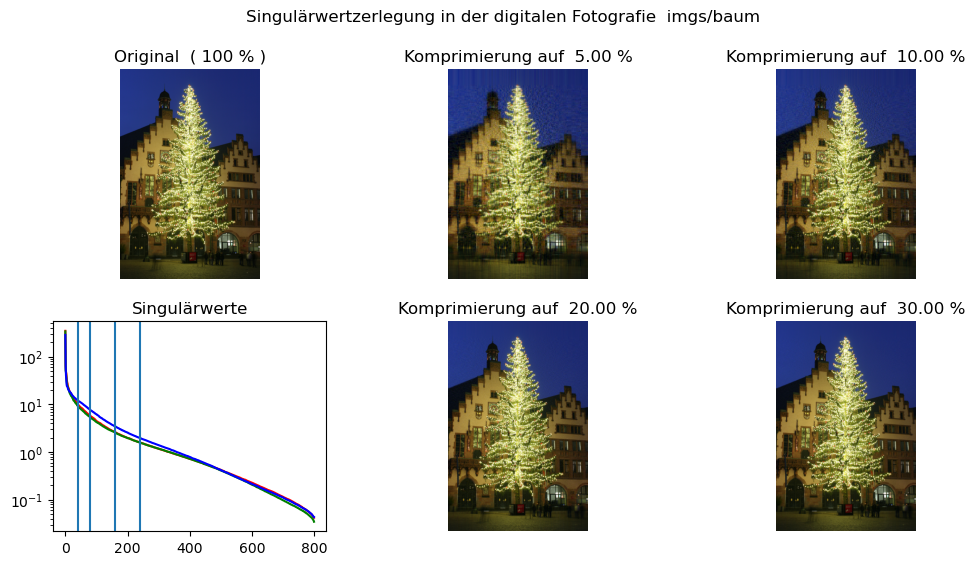

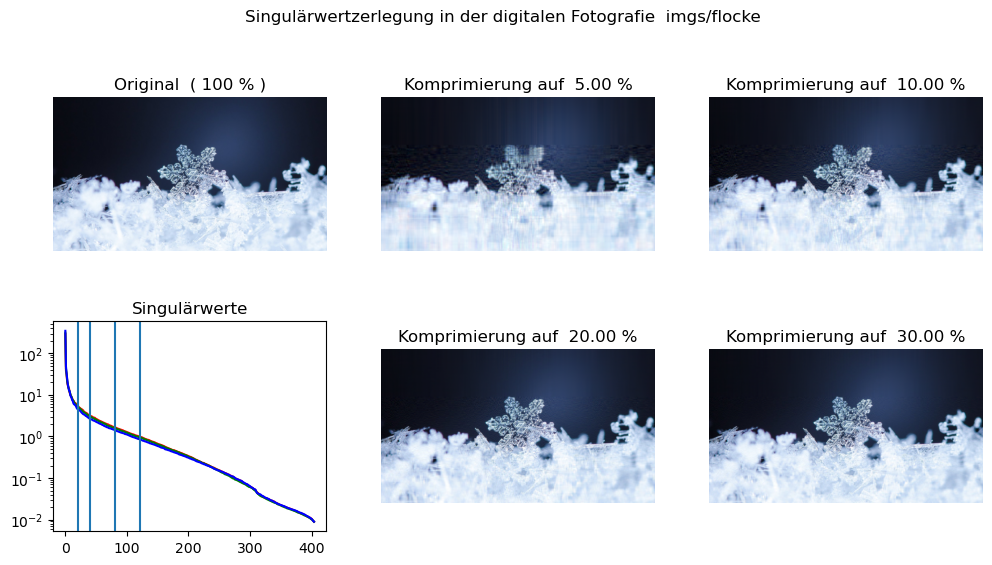

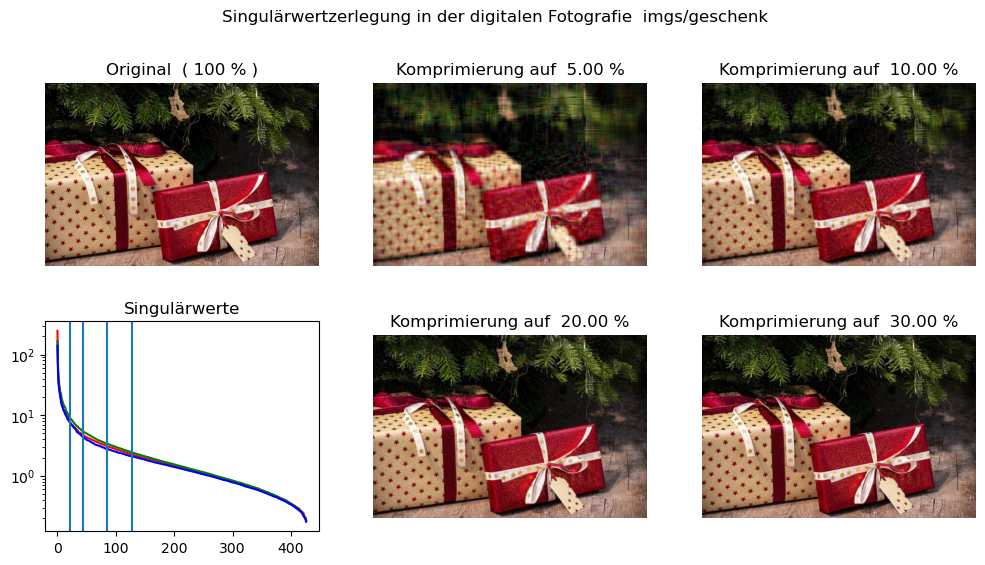

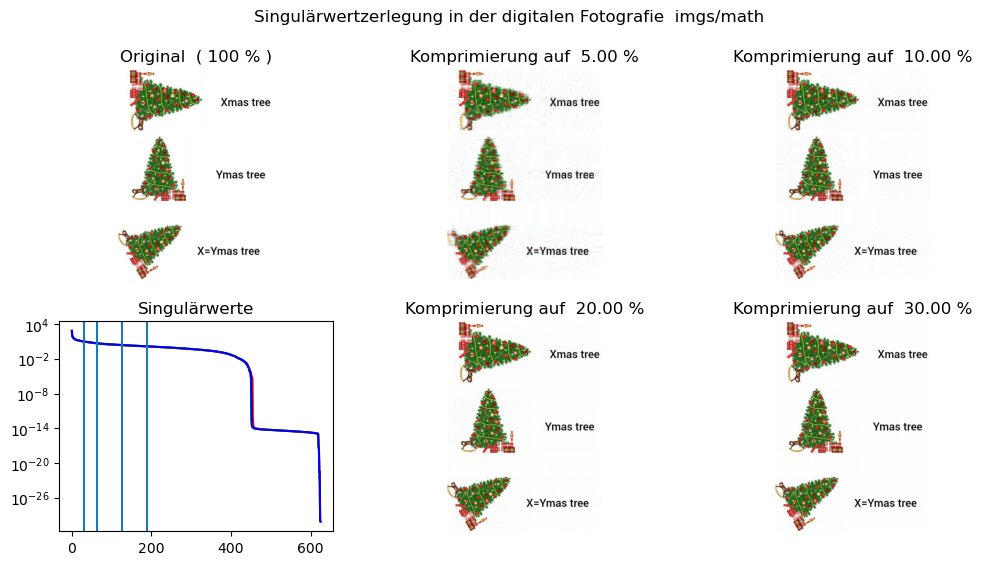

Speicherbedarf :      5.00%      10.00%      20.00%      30.00%     100.00%
     imgs/baum :      960480     1920960     3841920     5762880    11520000
   imgs/flocke :      270240      540480     1094472     1648464     3499200
 imgs/geschenk :      269136      551088     1089360     1640448     3279360
     imgs/math :      547212     1112076     2206500     3318576     6340128


In [4]:
def mapbild(filename, percentages):
    assert len(percentages) == 4
    
    img = mpimg.imread(filename)
    #
    #  Original-Bild
    #
    plt.figure("Singulärwertzerlegung in der digitalen Fotografie  " + filename, figsize=(12, 6))
    plt.clf()
    #
    plt.subplot(2, 3, 1)  # 2 Zeilen, 3 Spalten, Position 1 = (1,1)
    plt.title("Original  ( 100 % )")
    imgplot = plt.imshow(img)
    plt.axis("off")

    img = np.moveaxis(img, -1, 0)
    _, n, m = img.shape
    
    #
    s = np.linalg.svd(img, compute_uv=False)
    #
    #  Singulärwerte zeichnen:
    #
    plt.subplot(2, 3, 4)  #  Position: Zeile 2, Spalte 1
    plt.title("Singulärwerte")
    for i in range(3):
        color = ["r", "g", "b"][i]
        plt.semilogy(s[i], color+"-")
    
    for i in range(len(percentages)):
        plt.axvline(int(round(percentages[i] * min(n, m))))

    memory = np.zeros(len(percentages) + 1)
    memory[-1] = img.nbytes
    for i in range(len(percentages)):
        plt.subplot(2, 3, 2 + i + (i // 2))
        u, s, v = compress(img, percentages[i])
        memory[i] = u.nbytes + s.nbytes + v.nbytes
        decompressed_img = decompress(u, s, v)
        decompressed_img = np.moveaxis(decompressed_img, 0, -1)
        plt.title("Komprimierung auf  %.2f %%" % (percentages[i] * 100.0))
        plt.imshow(np.maximum(0.0, np.minimum(1.0, decompressed_img)))
        plt.axis("off")
        
    #  plt.title beschriftet die Teil-Grafiken.
    #  Hier kommt die Gesamt-Ueberschrift:
    plt.suptitle("Singulärwertzerlegung in der digitalen Fotografie  " + filename[:-4])
    plt.show()

    return memory

filenames = ["imgs/baum.png", "imgs/flocke.png", "imgs/geschenk.png", "imgs/math.png"]

percentages = np.array([0.05, 0.10, 0.20, 0.30])
memory = np.zeros((len(filenames), len(percentages) + 1))
for i, filename in enumerate(filenames):
    memory[i] = mapbild(filename, percentages)

print(
    "Speicherbedarf : %9.2f%%  %9.2f%%  %9.2f%%  %9.2f%%  %9.2f%%"
    % tuple(list(percentages * 100.0) + [100.0])
)
for i, filename in enumerate(filenames):
    print(
        "%14s :  %10d  %10d  %10d  %10d  %10d"
        % tuple([filename[:-4]] + list(memory[i]))
    )